In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
# Load dataset
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

In [3]:
#look at data
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#look at data types of columns
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
#make sure test doesn't have train answers
X = train.drop(columns=['Transported'])

#make sure test only has answers
y = train['Transported']
print(y.head())



0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool


In [6]:
#impute data before train test split
#only keep numeric columns for GaussianNB and see what happens

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

num_imputer = SimpleImputer(strategy='median').set_output(transform="pandas")


X = num_imputer.fit_transform(X[numeric_cols])



In [7]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
y_train.head()

3600     True
1262     True
8612    False
5075     True
4758    False
Name: Transported, dtype: bool

In [9]:
#keep only numerics and try Gaussian
X_train.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [10]:
X.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [11]:
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [12]:
pred = Gnb.predict(X_test)
print("acc:", accuracy_score(y_test, pred))

acc: 0.6791259344450834


In [13]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3600,0.0,0.0,0.0,0.0,0.0,0.0
1262,17.0,0.0,0.0,0.0,0.0,0.0
8612,35.0,0.0,0.0,0.0,0.0,0.0
5075,26.0,0.0,0.0,0.0,0.0,0.0
4758,13.0,0.0,0.0,60.0,1.0,5147.0


In [14]:
#get all cols back
#make sure test doesn't have train answers
X = train.drop(columns=['Transported'])

#make sure test only has answers
y = train['Transported']
print(X.head())


# split FIRST (so X_train/X_test exist)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1) identify columns
num_cols = X_train.select_dtypes(include="number").columns
cat_cols = X_train.select_dtypes(include="object").columns

# optional: usually good to drop these from categoricals
cat_cols = cat_cols.drop(["PassengerId", "Name"], errors="ignore")

# 2) impute
num_imp = SimpleImputer(strategy="median").set_output(transform="pandas")
cat_imp = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")

X_train_num = num_imp.fit_transform(X_train[num_cols])
X_test_num  = num_imp.transform(X_test[num_cols])

X_train_cat = cat_imp.fit_transform(X_train[cat_cols])
X_test_cat  = cat_imp.transform(X_test[cat_cols])

# 3) one-hot encode categoricals -> DataFrames
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe  = ohe.transform(X_test_cat)

# 4) combine numeric + encoded categorical
X_train_final = pd.concat([X_train_num, X_train_ohe], axis=1)
X_test_final  = pd.concat([X_test_num,  X_test_ohe], axis=1)





  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy  
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines  
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent  
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent  
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines  


In [15]:
#check to make sure no nulls
X_train_final.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
                            ..
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
Length: 5451, dtype: int64

In [16]:
if "Age" in X_train_final.columns:
    print("has Age")


has Age


In [17]:

Gnb2 = GaussianNB()

In [18]:
Gnb2.fit(X_train_final, y_train)
pred_encoded = Gnb2.predict(X_test_final)
print("acc with encoded categorical variables:", accuracy_score(y_test, pred_encoded))

acc with encoded categorical variables: 0.648073605520414


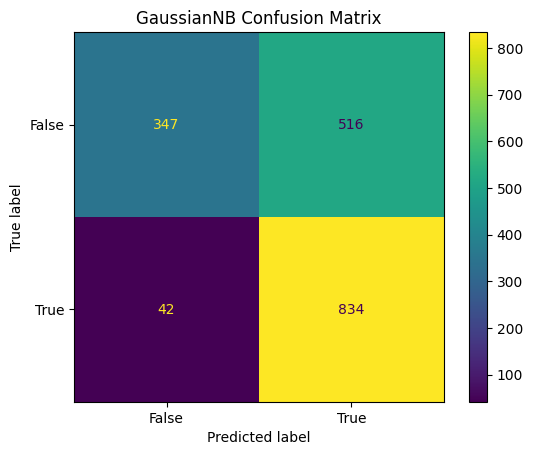

In [19]:
#above shows ok fits, now lets do data exploration on the models
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("GaussianNB Confusion Matrix")
plt.show()




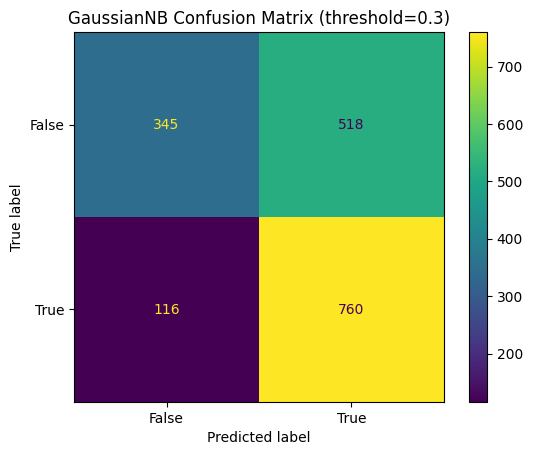

0.6354226566992525


In [20]:
proba = Gnb2.predict_proba(X_test_final)[:, 1]

t = 0.3  # try 0.6, 0.7, 0.8
pred_t = (proba >= t)

ConfusionMatrixDisplay.from_predictions(y_test, pred_t)
plt.title(f"GaussianNB Confusion Matrix (threshold={t})")
plt.show()


acc = accuracy_score(y_test, pred_t)
print(acc)


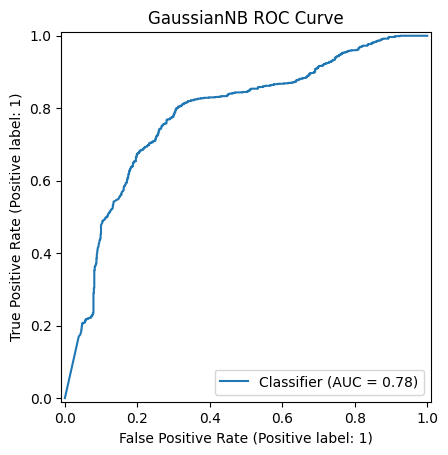

In [21]:
from sklearn.metrics import RocCurveDisplay

proba = Gnb2.predict_proba(X_test_final)[:, 1]
RocCurveDisplay.from_predictions(y_test, proba)
plt.title("GaussianNB ROC Curve")
plt.show()


In [25]:
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
)

model.fit(X_train_final, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [26]:
pred_encoded = model.predict(X_test_final)
print("acc with encoded categorical variables:", accuracy_score(y_test, pred_encoded))

acc with encoded categorical variables: 0.7975848188614146


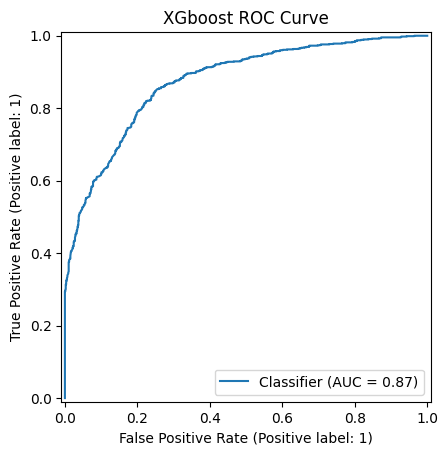

In [27]:
from sklearn.metrics import RocCurveDisplay

proba = model.predict_proba(X_test_final)[:, 1]
RocCurveDisplay.from_predictions(y_test, proba)
plt.title("XGboost ROC Curve")
plt.show()
